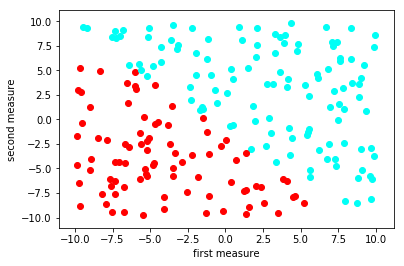

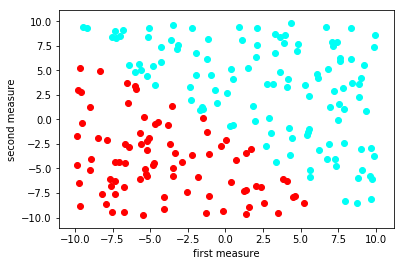

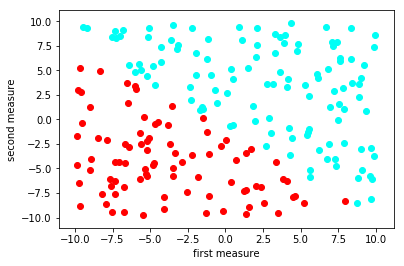

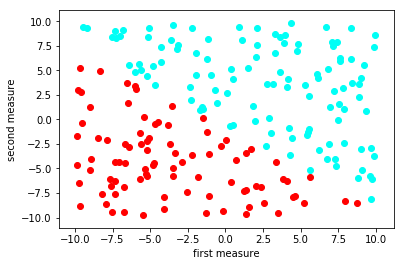

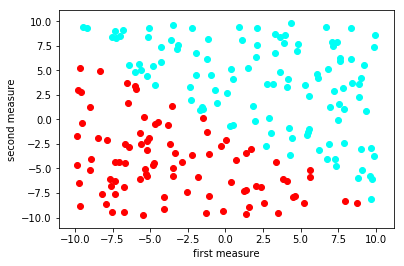

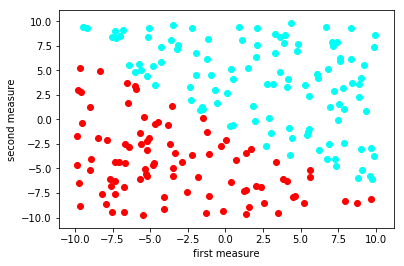

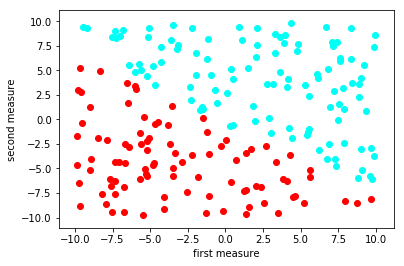

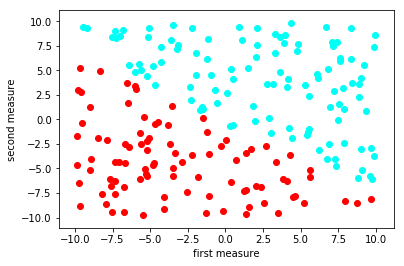

In [59]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math

amount=200
rang=10
precise=2
clusters_am=2

x=np.empty(amount)
y=np.empty(amount)

def check_range(x1,y1,x2,y2):
    
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)
    

for i in range(amount):
    x[i]=np.round(np.random.uniform(-1*rang,rang),precise)
    y[i]=np.round(np.random.uniform(-1*rang,rang),precise)
    
points=((np.concatenate([x,y,np.zeros(amount)])).reshape(3,-1)).T

colors=[]

for i in range(clusters_am):

    colors.append(cm.hsv(i/clusters_am))

centers=(np.empty(2*clusters_am)).reshape(-1,2)

for i in range(clusters_am):
    centers[i][0]=np.round(np.random.uniform(-1*rang,rang),precise)
    centers[i][1]=np.round(np.random.uniform(-1*rang,rang),precise)
    
    
flag=True
    
while flag:

        
    fig=plt.figure()
    
    plt.xlabel('first measure')
    plt.ylabel('second measure')
    
    for i in range(amount):
        m_range=2*rang;
        for j in range(clusters_am):

            curr=check_range(points[i][0],points[i][1],centers[j][0],centers[j][1])

            if curr<=m_range :
                m_range=curr
                points[i][2]=j


    for i in range(amount):

        plt.scatter(points[i][0],points[i][1],color=colors[int(points[i][2])])

    new_centers=(np.empty(2*clusters_am)).reshape(-1,2)
    
    for j in range (clusters_am):
        
        curr_x=0;
        x_am=0;
        curr_y=0;
        y_am=0;
        
        for i in range (amount):
            
            if points[i][2]==j:
                
                curr_x+=points[i][0]
                curr_y+=points[i][1]
                
                x_am+=1
                y_am+=1
                
        new_centers[j][0]=curr_x/x_am
        new_centers[j][1]=curr_y/y_am
        
    new_flag=True
    
    for j in range(clusters_am):
        
        for k in range(2):
            
            if centers[j][k]!=new_centers[j][k] :
                centers[j][k]=new_centers[j][k]
                new_flag=False
            
    flag=not new_flag
    
    plt.show()
                